In [27]:
# Import Librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r'F:\JUPTER NOTEBOOK\RAVI SHANKAR PROJECTS\CODSOFT\advertising.csv')

In [40]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [41]:
# check for number of columns and rows

print('rows: ',df.shape[0])
print('columns: ',df.shape[1])

rows:  200
columns:  4


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
# All the variables are numerical

In [44]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [45]:
# no null value is present in columns

In [46]:
df.duplicated().sum()

0

In [47]:
# No duplicate values present in the data

In [48]:
df.describe(include = 'all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

In [59]:
num_cols = []

for cols in df.columns:
    if df.dtypes[cols] != 'object':
        num_cols.append(cols)   

In [60]:
num_cols

['TV', 'Radio', 'Newspaper', 'Sales']

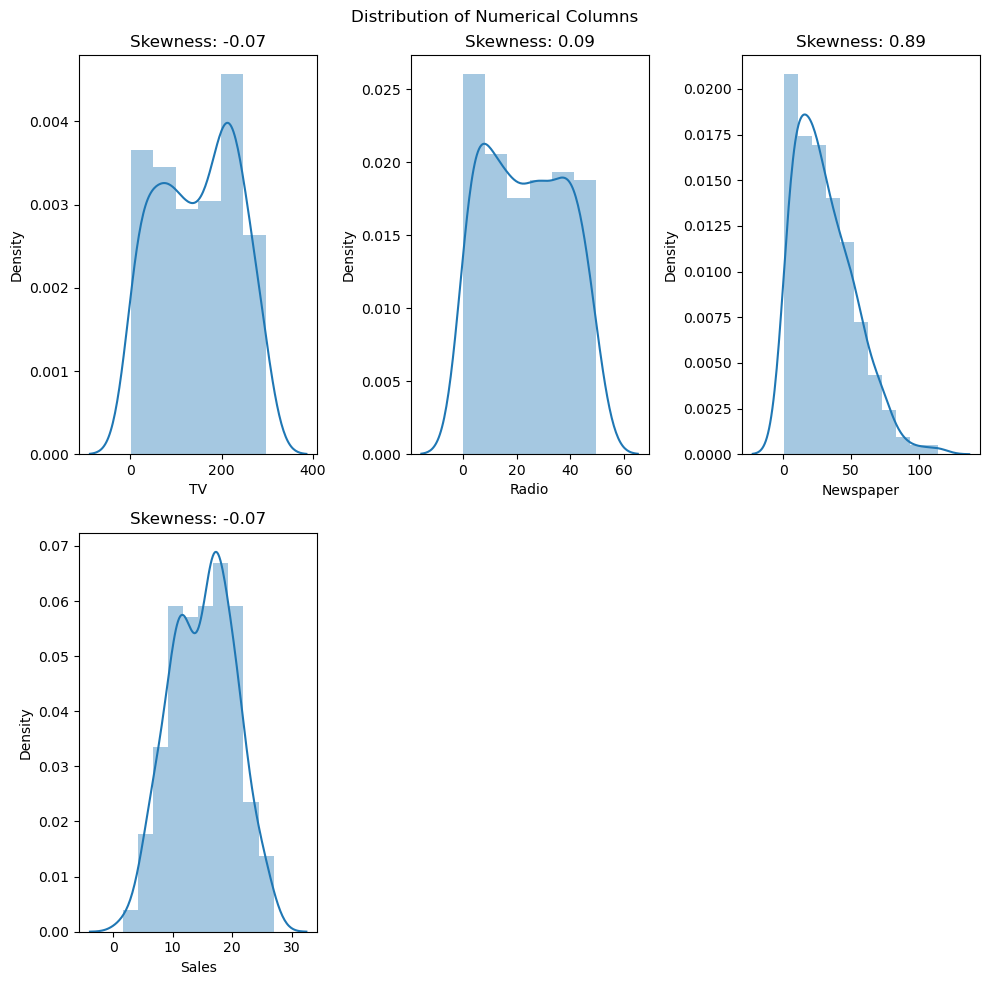

In [61]:
r =2
c =3
repeator =1
plt.figure(figsize=(10,10))

for i in num_cols:
    plt.subplot(r,c,repeator)
    sns.distplot(df[i])
    plt.title('Skewness: %.2f'%(df[i].skew()))
    repeator+=1
plt.suptitle('Distribution of Numerical Columns')
plt.tight_layout()
plt.show()

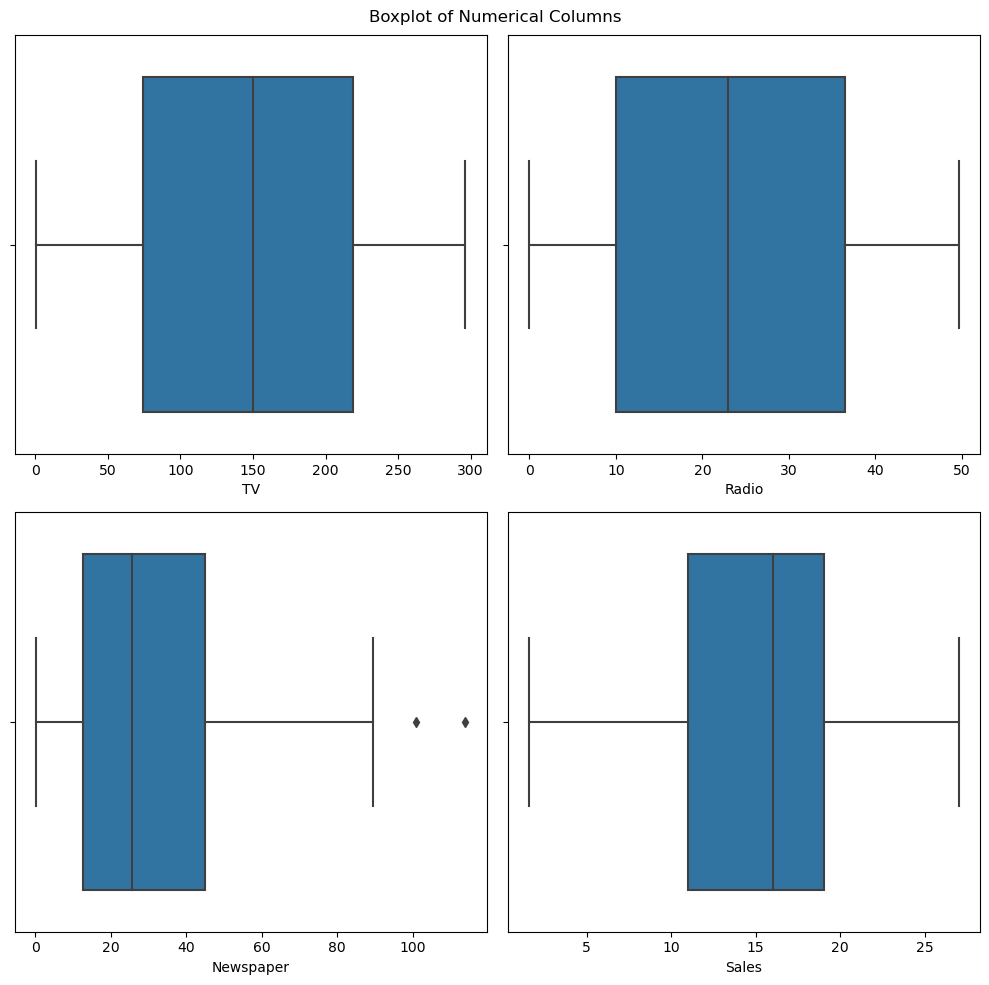

In [72]:
r =2
c =2
repeator =1
plt.figure(figsize=(10,10))

for i in num_cols:
    plt.subplot(r,c,repeator)
    sns.boxplot(df[i])
    repeator+=1
plt.suptitle('Boxplot of Numerical Columns')
plt.tight_layout()
plt.show()

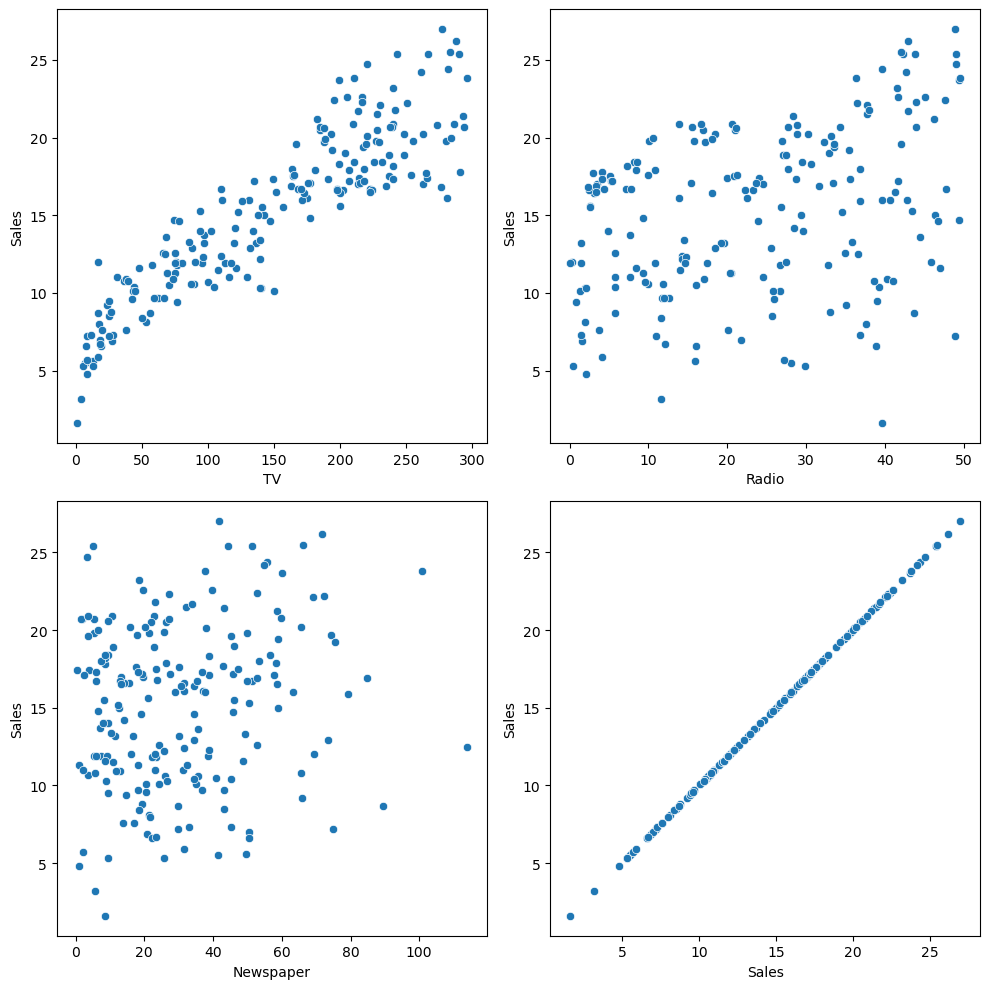

In [73]:
# Bivariate Analysis
r = 2
c = 2
repeator =1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(r,c,repeator)
    sns.scatterplot(df[i], df['Sales'])
    repeator+=1
plt.tight_layout()
plt.show()

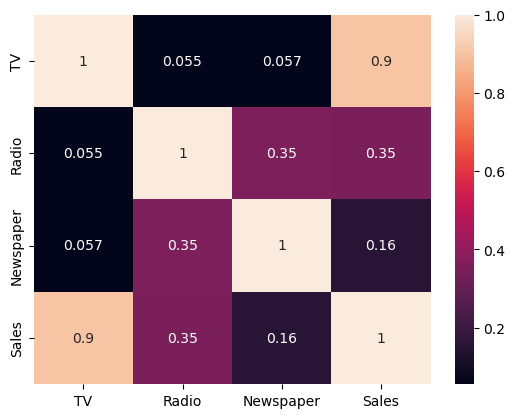

In [75]:
sns.heatmap(df.corr(), annot =True)
plt.show()

As we can look from the heatmap 
1. Newspaper and Radio are higly correlated to each other.
2. Radio and Sales also showing good relationship here.

### Splitting the Data

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error,r2_score

In [79]:
x = df.drop('Sales',axis=1)
y = df['Sales']

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.2,random_state=42)

### Model Prediction

In [82]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [83]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [87]:
model.intercept_

4.714126402214127

In [88]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [93]:
accuracy_score = model.score(x_test,y_test)*100

In [95]:
print('Accuracy of model:', round(accuracy_score,2))

Accuracy of model: 90.59


In [84]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 2.91


In [85]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # setting squared=False gives RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared: 0.91


The linear regression model provides a strong fit to the data, explaining 90.59% of the variability in Sales using the predictors TV, Radio, and Newspaper. On average, the model's predictions are off by about 1.71 units from the actual Sales values. Given the high R-squared value, the model seems to be capturing the underlying relationship effectively. However, when evaluating the performance, it's crucial to consider domain-specific knowledge, the scale of the 'Sales' variable, and the business implications of the RMSE value.



**Business Summary:**

We built a predictive model to understand and quantify the relationships between advertising spends across TV, Radio, and Newspaper channels, and the resulting Sales.

The model can account for a significant 91% of the variations in Sales based on the advertising spends across the three channels. This high degree of fit suggests that our advertising inputs are strong predictors of sales outcomes, and decision-makers can rely on this model to understand the impact of advertising strategies.